## <center>ENCRYPTIX_TASK 01</center>
### <center> TITANIC SURVIVAL PREDICTION</center>

->Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

->The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
import pandas as pd

# Load the dataset
titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dispalying basic information

In [2]:
# Display basic information about the dataset
print(titanic_df.info())
print(titanic_df.describe())
print(titanic_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### Visualising the data

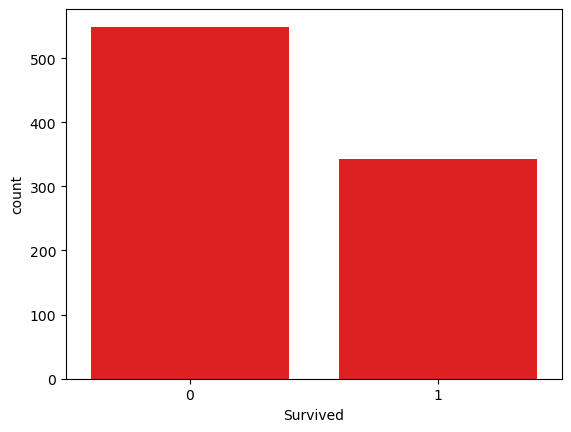

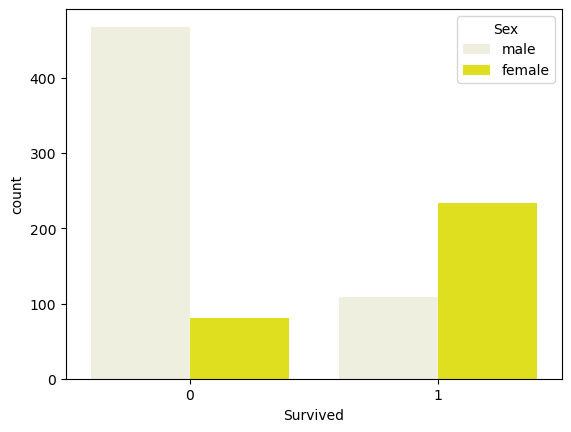

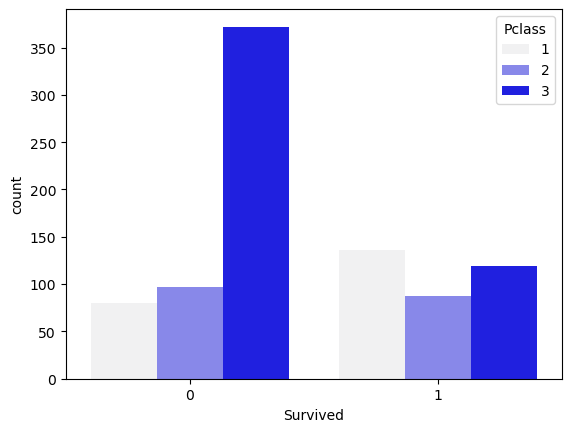

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of survivors
sns.countplot(x='Survived', data=titanic_df, color="red")
plt.show()

# Plot the count of survivors based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df, color="yellow")
plt.show()

# Plot the count of survivors based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_df,color="blue")
plt.show()


### Countplot for categorical variables

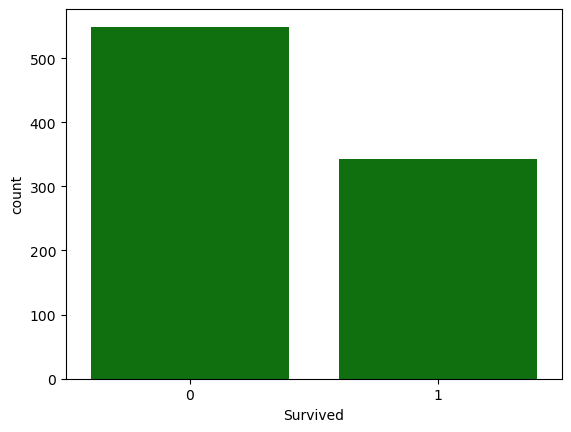

In [68]:
# Countplot for Survived
sns.countplot(data=titanic_df, x='Survived', color="green")
plt.show()


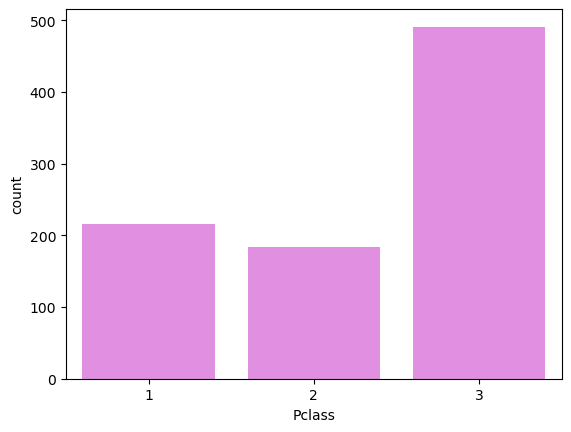

In [4]:
# Countplot for Pclass
sns.countplot(data=titanic_df, x='Pclass',color="violet")
plt.show()

### Distribution of numerical features

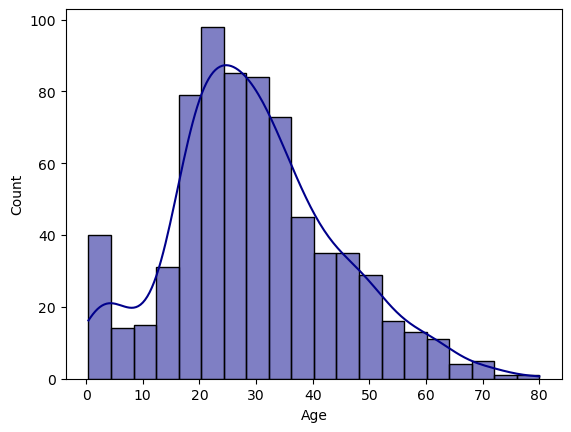

In [5]:
# Distribution of Age
sns.histplot(titanic_df['Age'].dropna(), kde=True,color="darkblue")
plt.show()

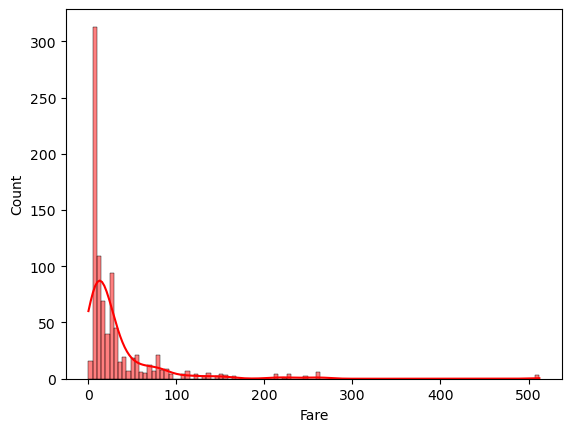

In [6]:
# Distribution of Fare
sns.histplot(titanic_df['Fare'], kde=True, color="red")
plt.show()

### Box plot to identify outliers

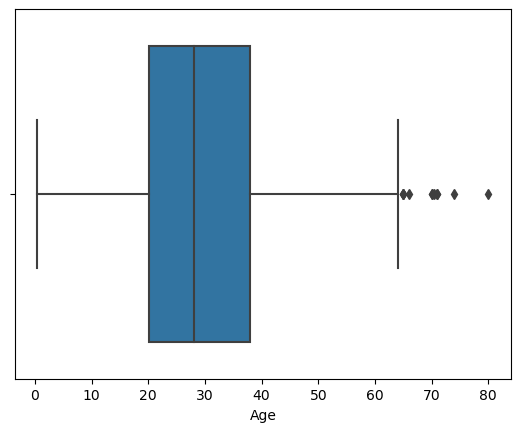

In [7]:
# Boxplot for Age
sns.boxplot(data=titanic_df, x='Age')
plt.show()

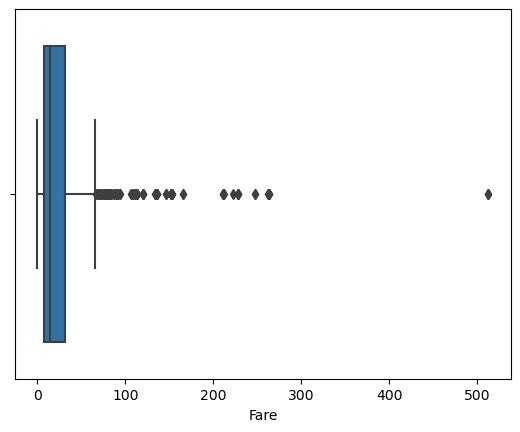

In [8]:
# Boxplot for Fare
sns.boxplot(data=titanic_df, x='Fare')
plt.show()

### Survival Rate by Different Features

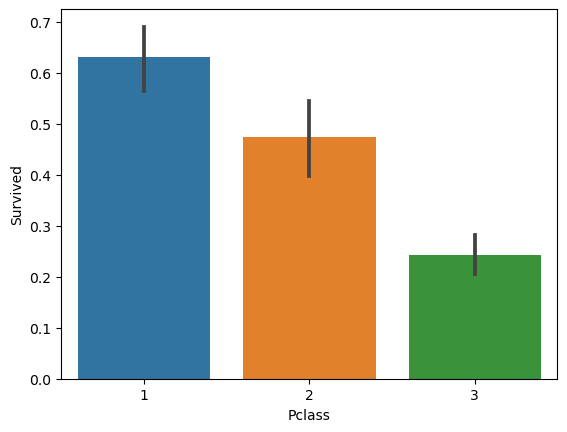

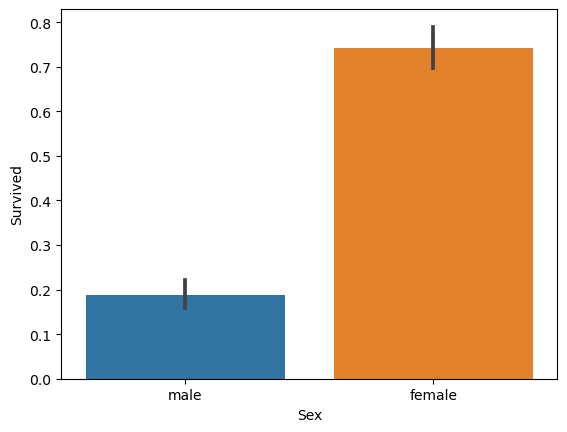

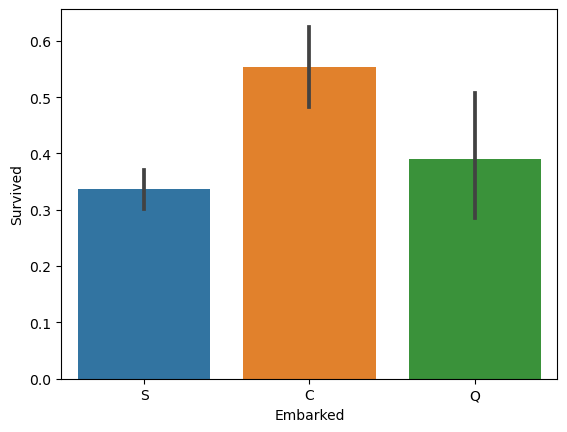

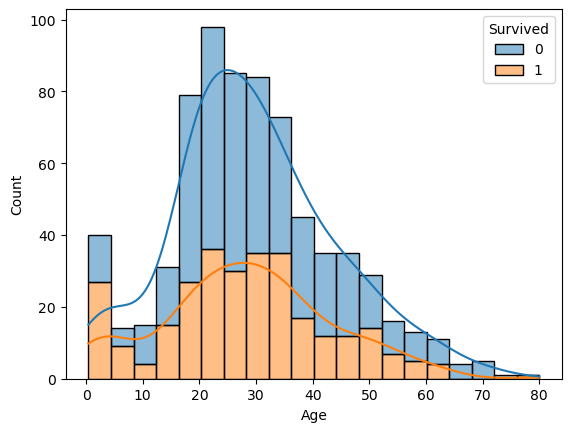

In [9]:
# Survival rate by Pclass
sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.show()

# Survival rate by Sex
sns.barplot(data=titanic_df, x='Sex', y='Survived')
plt.show()

# Survival rate by Embarked
sns.barplot(data=titanic_df, x='Embarked', y='Survived')
plt.show()

# Survival rate by Age (using a histogram with KDE)
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()


## Data Preprocessing

 ### 1.Handling missing data

In [10]:
# Check for missing values
print(titanic_df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Fill missing values for 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)



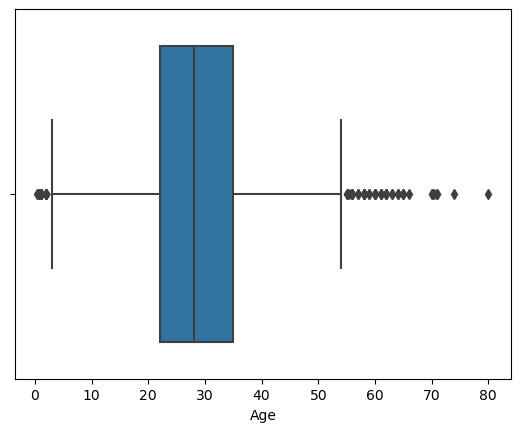

In [12]:
# Boxplot for Age
sns.boxplot(data=titanic_df, x='Age')
plt.show()

In [13]:
# Drop a single column, e.g., 'Cabin'
titanic_df.drop(columns=['Cabin'], inplace=True)


### 2.Encode categorical variables

In [14]:
# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)
titanic_df


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False


## Model Building

### 1.Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target
X = titanic_df.drop(columns=['Survived', 'Name', 'Ticket'])
y = titanic_df['Survived']



In [16]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,28.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
 331          332       1  45.5      0      0   28.5000      True       False   
 733          734       2  23.0      0      0   13.0000      True       False   
 382          383       3  32.0      0      0    7.9250      True       False   
 704          705       3  26.0      1      0    7.8542      True       False   
 813          814       3   6.0      4      2   31.2750     False       False   
 ..           ...     ...   ...    ...    ...       ...       ...         ...   
 106          107       3  21.0      0      0    7.6500     False       False   
 270          271       1  28.0      0      0   31.0000      True       False   
 860          861       3  41.0      2      0   14.1083      True       False   
 435          436       1  14.0      1      2  120.0000     False       False   
 102          103       1  21.0      0      1   77.2875      True       False   
 
      Embarked_S  
 331   

### 2. Training the model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:

# Make predictions
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## Prediction for a new data point

In [22]:
import numpy as np
# Example: Predicting for a new passenger
new_passenger = np.array([[3, 22, 1, 0, 7.25, 0, 1, 0,1]])  
new_survival_status = model.predict(new_passenger)
print("Predicted Survival:", "Survived" if new_survival_status[0] == 1 else "Did not survive")


Predicted Survival: Survived


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Example: Predicting for a new passenger
new_passenger = np.array([[710, 3, 28, 0, 7.25, 0, 1, 1,0]])  # Example features
new_survival_status = model.predict(new_passenger)
print("Predicted Survival:", "Survived" if new_survival_status[0] == 1 else "Did not survive")


Predicted Survival: Did not survive


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
